In [148]:
import numpy as np
import seaborn as sns
from sklearn import svm
import matplotlib.pyplot as plt
from ipaddress import collapse_addresses
from sklearn import datasets, svm, metrics
from matplotlib.colors import ListedColormap
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons, make_circles


In [149]:
X,y = make_moons(noise=0.3, random_state=0, n_samples=10000)
X, y = make_circles(noise=0.2, factor=0.5, random_state=1)

print(X.shape)
print(y.shape)
print(X)
print(X)

(100, 2)
(100,)
[[-0.38289117 -0.09084004]
 [-0.02096229 -0.47787416]
 [-0.39611596 -1.28942694]
 [-0.61813018 -0.06383715]
 [ 0.70347838 -0.18703837]
 [-0.45970463  0.69477465]
 [-0.45091682 -0.71570524]
 [-0.45562004 -0.13406016]
 [-0.26513904  0.40812871]
 [-0.15474648  0.41406973]
 [ 0.231206   -0.53275899]
 [ 0.15623875 -0.8678088 ]
 [ 0.51647541  0.48940995]
 [ 0.68707007 -0.02334129]
 [ 0.54759869 -0.16482373]
 [-0.32179572 -0.80553536]
 [-1.07478639 -0.733362  ]
 [ 0.76758455 -0.43498783]
 [-0.47475234 -0.33813186]
 [ 0.15420656  1.07306032]
 [ 0.65916696  0.20773634]
 [-0.77795003  0.1326555 ]
 [ 0.47025454 -0.31228748]
 [-0.04246799  0.26555446]
 [-0.72405954  0.48807185]
 [-0.36960005 -1.06514028]
 [ 0.17833327 -0.49718972]
 [-0.93927864 -0.41951638]
 [ 0.50914152 -0.70977467]
 [-0.05569852 -0.82162607]
 [-0.11214579  0.72197044]
 [ 0.80463921 -0.15221296]
 [ 0.08261487 -0.11749021]
 [ 0.20349541 -0.37396789]
 [ 0.13864693 -0.23905642]
 [ 0.32785307 -1.00769037]
 [ 0.8894406

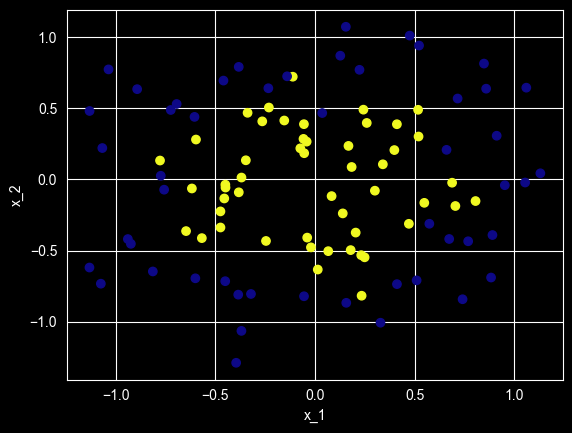

In [150]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="plasma")
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.show()

In [151]:
classifier = svm.SVC(kernel='rbf', C=10.0)
classifier.fit(X, y)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",10.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


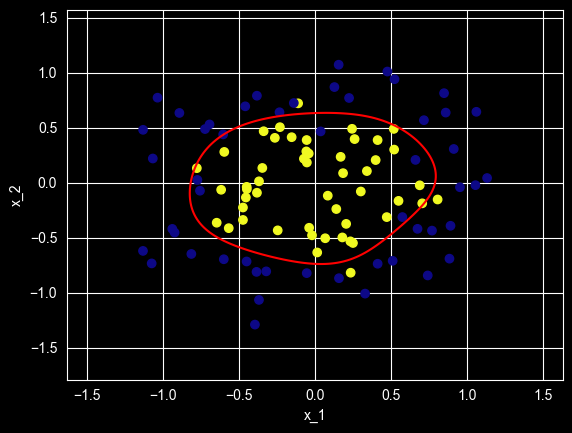

In [152]:
# pas de la grille
h = .02

# coordonnées min et max suivant les 2 coordonnées
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

# création d'une grille (maillage) suivant les coordonnées
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

# Z est la fonction de décision
Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
# redimensionnement pour l'affichage
Z = Z.reshape(xx.shape)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap="plasma")
plt.xlabel("x_1")
plt.ylabel("x_2")

# tracé sous forme d'un contour
plt.contour(xx, yy, Z, colors='red', levels=[0], linestyles=['-'])
plt.show()

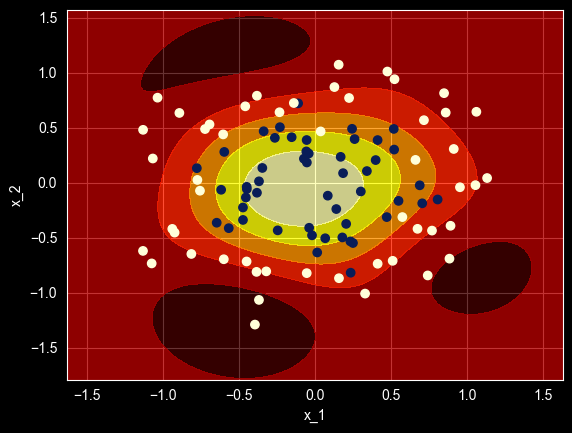

In [153]:
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.contourf(xx, yy, Z, cmap=plt.cm.hot, alpha=.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="YlGnBu")

plt.show()

In [154]:
X_test = np.array([[1.47, -0.99],[-0.55, 0.78],[2.25,-1.25]])

In [155]:
y_test = classifier.predict(X_test)
# affichage du résultat
print(y_test)

[0 0 0]


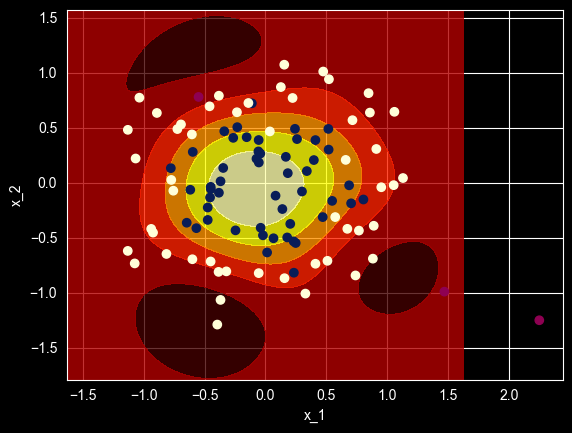

In [156]:
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.contourf(xx, yy, Z, cmap=plt.cm.hot, alpha=.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="YlGnBu")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap="PiYG")
plt.show()

In [157]:
digits= datasets.load_digits()

In [158]:
print(digits.target)

[0 1 2 ... 8 9 8]


In [159]:
for i in range(4):
    print(digits.images[i])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
[[ 0.  0.  0. 12. 13.  5.  0.  0.]
 [ 0.  0.  0. 11. 16.  9.  0.  0.]
 [ 0.  0.  3. 15. 16.  6.  0.  0.]
 [ 0.  7. 15. 16. 16.  2.  0.  0.]
 [ 0.  0.  1. 16. 16.  3.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  0. 11. 16. 10.  0.  0.]]
[[ 0.  0.  0.  4. 15. 12.  0.  0.]
 [ 0.  0.  3. 16. 15. 14.  0.  0.]
 [ 0.  0.  8. 13.  8. 16.  0.  0.]
 [ 0.  0.  1.  6. 15. 11.  0.  0.]
 [ 0.  1.  8. 13. 15.  1.  0.  0.]
 [ 0.  9. 16. 16.  5.  0.  0.  0.]
 [ 0.  3. 13. 16. 16. 11.  5.  0.]
 [ 0.  0.  0.  3. 11. 16.  9.  0.]]
[[ 0.  0.  7. 15. 13.  1.  0.  0.]
 [ 0.  8. 13.  6. 15.  4.  0.  0.]
 [ 0.  2.  1. 13. 13.  0.  0.  0.]
 [ 0.  0.  2. 15. 11.  1.  0.  0.]
 [ 0.  0.  0.  1.

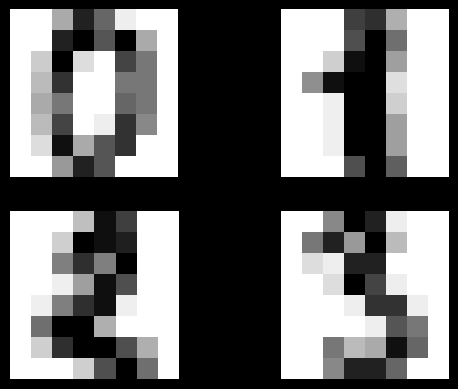

In [160]:
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.axis('off')
    plt.imshow(digits.images[i], cmap=plt.cm.gray_r,
    interpolation='nearest')
plt.show()

In [161]:
ratio = 0.5
data_learning, data_test, label_learning, label_test = train_test_split(digits.data, digits.target, test_size=ratio)

In [162]:
data_learning.shape

(898, 64)

In [163]:
classifier = svm.SVC(kernel='rbf', C=10.0)
classifier.fit(data_learning, label_learning)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",10.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [164]:
prediction = classifier.predict(data_test)

In [165]:
print(metrics.classification_report(label_test, prediction))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        91
           1       0.98      1.00      0.99        90
           2       1.00      1.00      1.00        90
           3       1.00      1.00      1.00        91
           4       0.99      1.00      0.99        91
           5       0.99      0.99      0.99        85
           6       1.00      1.00      1.00        98
           7       1.00      1.00      1.00        77
           8       0.99      0.98      0.98        82
           9       0.99      0.97      0.98       104

    accuracy                           0.99       899
   macro avg       0.99      0.99      0.99       899
weighted avg       0.99      0.99      0.99       899



In [166]:
metrics.confusion_matrix(label_test, prediction)

array([[ 90,   0,   0,   0,   1,   0,   0,   0,   0,   0],
       [  0,  90,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,  90,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  91,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,  91,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  84,   0,   0,   0,   1],
       [  0,   0,   0,   0,   0,   0,  98,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  77,   0,   0],
       [  0,   2,   0,   0,   0,   0,   0,   0,  80,   0],
       [  1,   0,   0,   0,   0,   1,   0,   0,   1, 101]])

In [167]:
classifier_mlp = MLPClassifier(hidden_layer_sizes=(15,),
    activation='logistic', alpha=1e-4,
    solver='sgd', tol=1e-4, random_state=1,
    learning_rate_init=.1, verbose=True)

In [168]:
classifier_mlp.fit(data_learning, label_learning)

Iteration 1, loss = 2.24645278
Iteration 2, loss = 1.93184200
Iteration 3, loss = 1.64962630
Iteration 4, loss = 1.36336983
Iteration 5, loss = 1.10305004
Iteration 6, loss = 0.88658759
Iteration 7, loss = 0.72132379
Iteration 8, loss = 0.58761567
Iteration 9, loss = 0.49275245
Iteration 10, loss = 0.42262899
Iteration 11, loss = 0.37019670
Iteration 12, loss = 0.32987375
Iteration 13, loss = 0.28976000
Iteration 14, loss = 0.25847532
Iteration 15, loss = 0.23619315
Iteration 16, loss = 0.22014437
Iteration 17, loss = 0.20684791
Iteration 18, loss = 0.18951265
Iteration 19, loss = 0.18022772
Iteration 20, loss = 0.16506908
Iteration 21, loss = 0.16141264
Iteration 22, loss = 0.15162394
Iteration 23, loss = 0.14129115
Iteration 24, loss = 0.13581341
Iteration 25, loss = 0.12942724
Iteration 26, loss = 0.12374071
Iteration 27, loss = 0.11855168
Iteration 28, loss = 0.11328371
Iteration 29, loss = 0.10754885
Iteration 30, loss = 0.10399916
Iteration 31, loss = 0.10314672
Iteration 32, los

/Users/valentin/Documents/Ynov/machine_learning/ML_Ynov_M1/.venv/lib/python3.14/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,"hidden_layer_sizes hidden_layer_sizes: array-like of shape(n_layers - 2,), default=(100,)The ith element represents the number of neurons in the ithhidden layer.","(15,)"
,"activation activation: {'identity', 'logistic', 'tanh', 'relu'}, default='relu'Activation function for the hidden layer.- 'identity', no-op activation, useful to implement linear bottleneck, returns f(x) = x- 'logistic', the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).- 'tanh', the hyperbolic tan function, returns f(x) = tanh(x).- 'relu', the rectified linear unit function, returns f(x) = max(0, x)",'logistic'
,"solver solver: {'lbfgs', 'sgd', 'adam'}, default='adam'The solver for weight optimization.- 'lbfgs' is an optimizer in the family of quasi-Newton methods.- 'sgd' refers to stochastic gradient descent.- 'adam' refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy BaFor a comparison between Adam optimizer and SGD, see:ref:`sphx_glr_auto_examples_neural_networks_plot_mlp_training_curves.py`.Note: The default solver 'adam' works pretty well on relativelylarge datasets (with thousands of training samples or more) in terms ofboth training time and validation score.For small datasets, however, 'lbfgs' can converge faster and performbetter.",'sgd'
,"alpha alpha: float, default=0.0001Strength of the L2 regularization term. The L2 regularization termis divided by the sample size when added to the loss.For an example usage and visualization of varying regularization, see:ref:`sphx_glr_auto_examples_neural_networks_plot_mlp_alpha.py`.",0.0001
,"batch_size batch_size: int, default='auto'Size of minibatches for stochastic optimizers.If the solver is 'lbfgs', the classifier will not use minibatch.When set to ""auto"", `batch_size=min(200, n_samples)`.",'auto'
,"learning_rate learning_rate: {'constant', 'invscaling', 'adaptive'}, default='constant'Learning rate schedule for weight updates.- 'constant' is a constant learning rate given by 'learning_rate_init'.- 'invscaling' gradually decreases the learning rate at each time step 't' using an inverse scaling exponent of 'power_t'. effective_learning_rate = learning_rate_init / pow(t, power_t)- 'adaptive' keeps the learning rate constant to 'learning_rate_init' as long as training loss keeps decreasing. Each time two consecutive epochs fail to decrease training loss by at least tol, or fail to increase validation score by at least tol if 'early_stopping' is on, the current learning rate is divided by 5.Only used when ``solver='sgd'``.",'constant'
,"learning_rate_init learning_rate_init: float, default=0.001The initial learning rate used. It controls the step-sizein updating the weights. Only used when solver='sgd' or 'adam'.",0.1
,"power_t power_t: float, default=0.5The exponent for inverse scaling learning rate.It is used in updating effective learning rate when the learning_rateis set to 'invscaling'. Only used when solver='sgd'.",0.5
,"max_iter max_iter: int, default=200Maximum number of iterations. The solver iterates until convergence(determined by 'tol') or this number of iterations. For stochasticsolvers ('sgd', 'adam'), note that this determines the number of epochs(how many times each data point will be used), not the number ofgradient steps.",200
,"shuffle shuffle: bool, default=TrueWhether to shuffle samples in each iteration. Only used whensolver='sgd' or 'adam'.",True
,"random_state random_state: int, RandomState instance, default=NoneDetermines random number generation for weights and biasinitialization, train-test split if early stopping is used, and batchsampling when solver='sgd' or 'adam'.Pass an int for reproducible results across multiple function calls.See :term:`Glossary `.",1


In [169]:
prediction_mlp = classifier_mlp.predict(data_test)

In [170]:
metrics.confusion_matrix(label_test, prediction_mlp)

array([[ 88,   0,   0,   0,   0,   0,   3,   0,   0,   0],
       [  0,  89,   0,   0,   0,   0,   0,   0,   0,   1],
       [  0,   0,  88,   1,   0,   0,   0,   0,   1,   0],
       [  0,   0,   0,  90,   0,   0,   0,   0,   0,   1],
       [  1,   1,   0,   0,  86,   0,   0,   0,   2,   1],
       [  0,   0,   0,   0,   0,  84,   0,   0,   0,   1],
       [  0,   0,   0,   0,   0,   0,  98,   0,   0,   0],
       [  0,   0,   0,   0,   2,   0,   0,  75,   0,   0],
       [  0,   4,   0,   2,   0,   2,   0,   0,  74,   0],
       [  0,   1,   0,   1,   0,   0,   0,   0,   2, 100]])

In [171]:
print(metrics.classification_report(label_test, prediction_mlp))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        91
           1       0.94      0.99      0.96        90
           2       1.00      0.98      0.99        90
           3       0.96      0.99      0.97        91
           4       0.98      0.95      0.96        91
           5       0.98      0.99      0.98        85
           6       0.97      1.00      0.98        98
           7       1.00      0.97      0.99        77
           8       0.94      0.90      0.92        82
           9       0.96      0.96      0.96       104

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899

